In [1]:
from speedml import Speedml
sml = Speedml('./input/train.csv', 
              './input/test.csv', 
              target = 'SalePrice',
              uid = 'Id')
sml.shape()

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


u'train (1460, 80) | test (1459, 79)'

In [4]:
sml.configure('overfit_threshold', 
              sml.np.sqrt(sml.train.shape[0]) / sml.train.shape[0])

{u'high_cardinality': 10,
 u'outlier_threshold': 3,
 u'outpath': u'output/',
 u'overfit_threshold': 0.026171196129510684,
 u'unique_ratio': 80}

In [62]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Outliers Upper,"[BsmtFinSF2, LowQualFinSF, BsmtHalfBath, Kitch...",Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (1460, 80) | test (1459, 79)",
Numerical Ratio,46%,Aim for 100% numerical.
Numerical High-cardinality,"[MSSubClass, BsmtFinSF2, LowQualFinSF, GrLivAr...",(>10) categories. Use feature.density
Numerical Categorical,"[OverallQual, OverallCond, BsmtFullBath, BsmtH...",Use plot.ordinal.
Text High-cardinality,"[Exterior1st, Exterior2nd, Neighborhood]",(>10) categories. Use feature.labels.
Text Categorical,"[MasVnrType, LotConfig, GarageQual, GarageFini...",Use feature.labels or feature.mapping.
Target Analysis (SalePrice),Pre-process.,Dimensionality reduction?


In [63]:
sml.train.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,LotArea_density,1stFlrSF_density,LotFrontage_density,YearBuilt_density,YearRemodAdd_density,GarageArea_density,MasVnrArea_density,BsmtFinSF1_density,TotalBsmtSF_density,2ndFlrSF_density
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,6,1,44,45,51,2,4,2,3,1
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,24,2,69,33,30,7,861,1,2,829
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,4,2,19,20,48,2,2,2,2,3
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,1,2,143,10,26,3,861,2,9,5
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,1,2,9,24,55,3,3,4,3,1


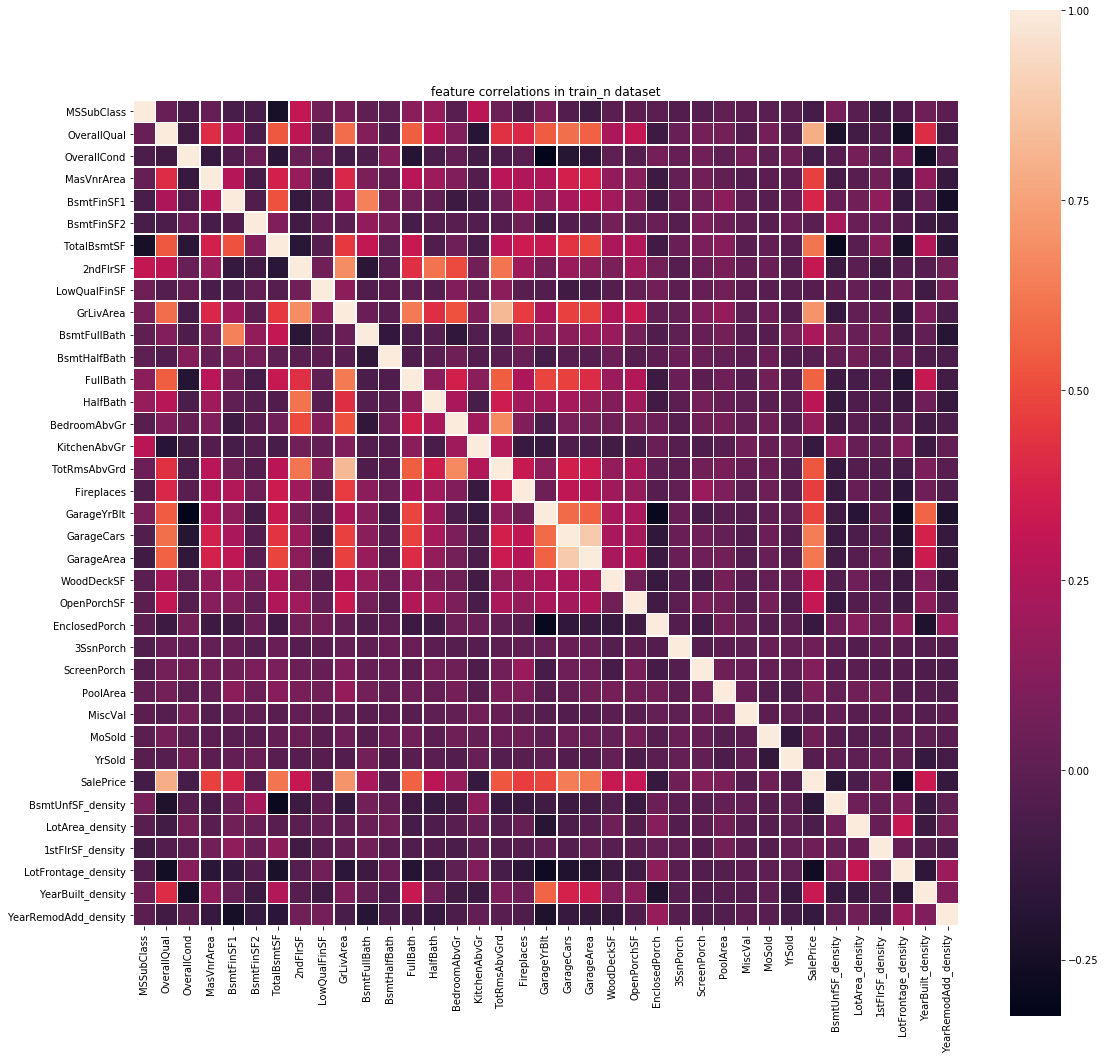

In [38]:
sml.plot.correlate()

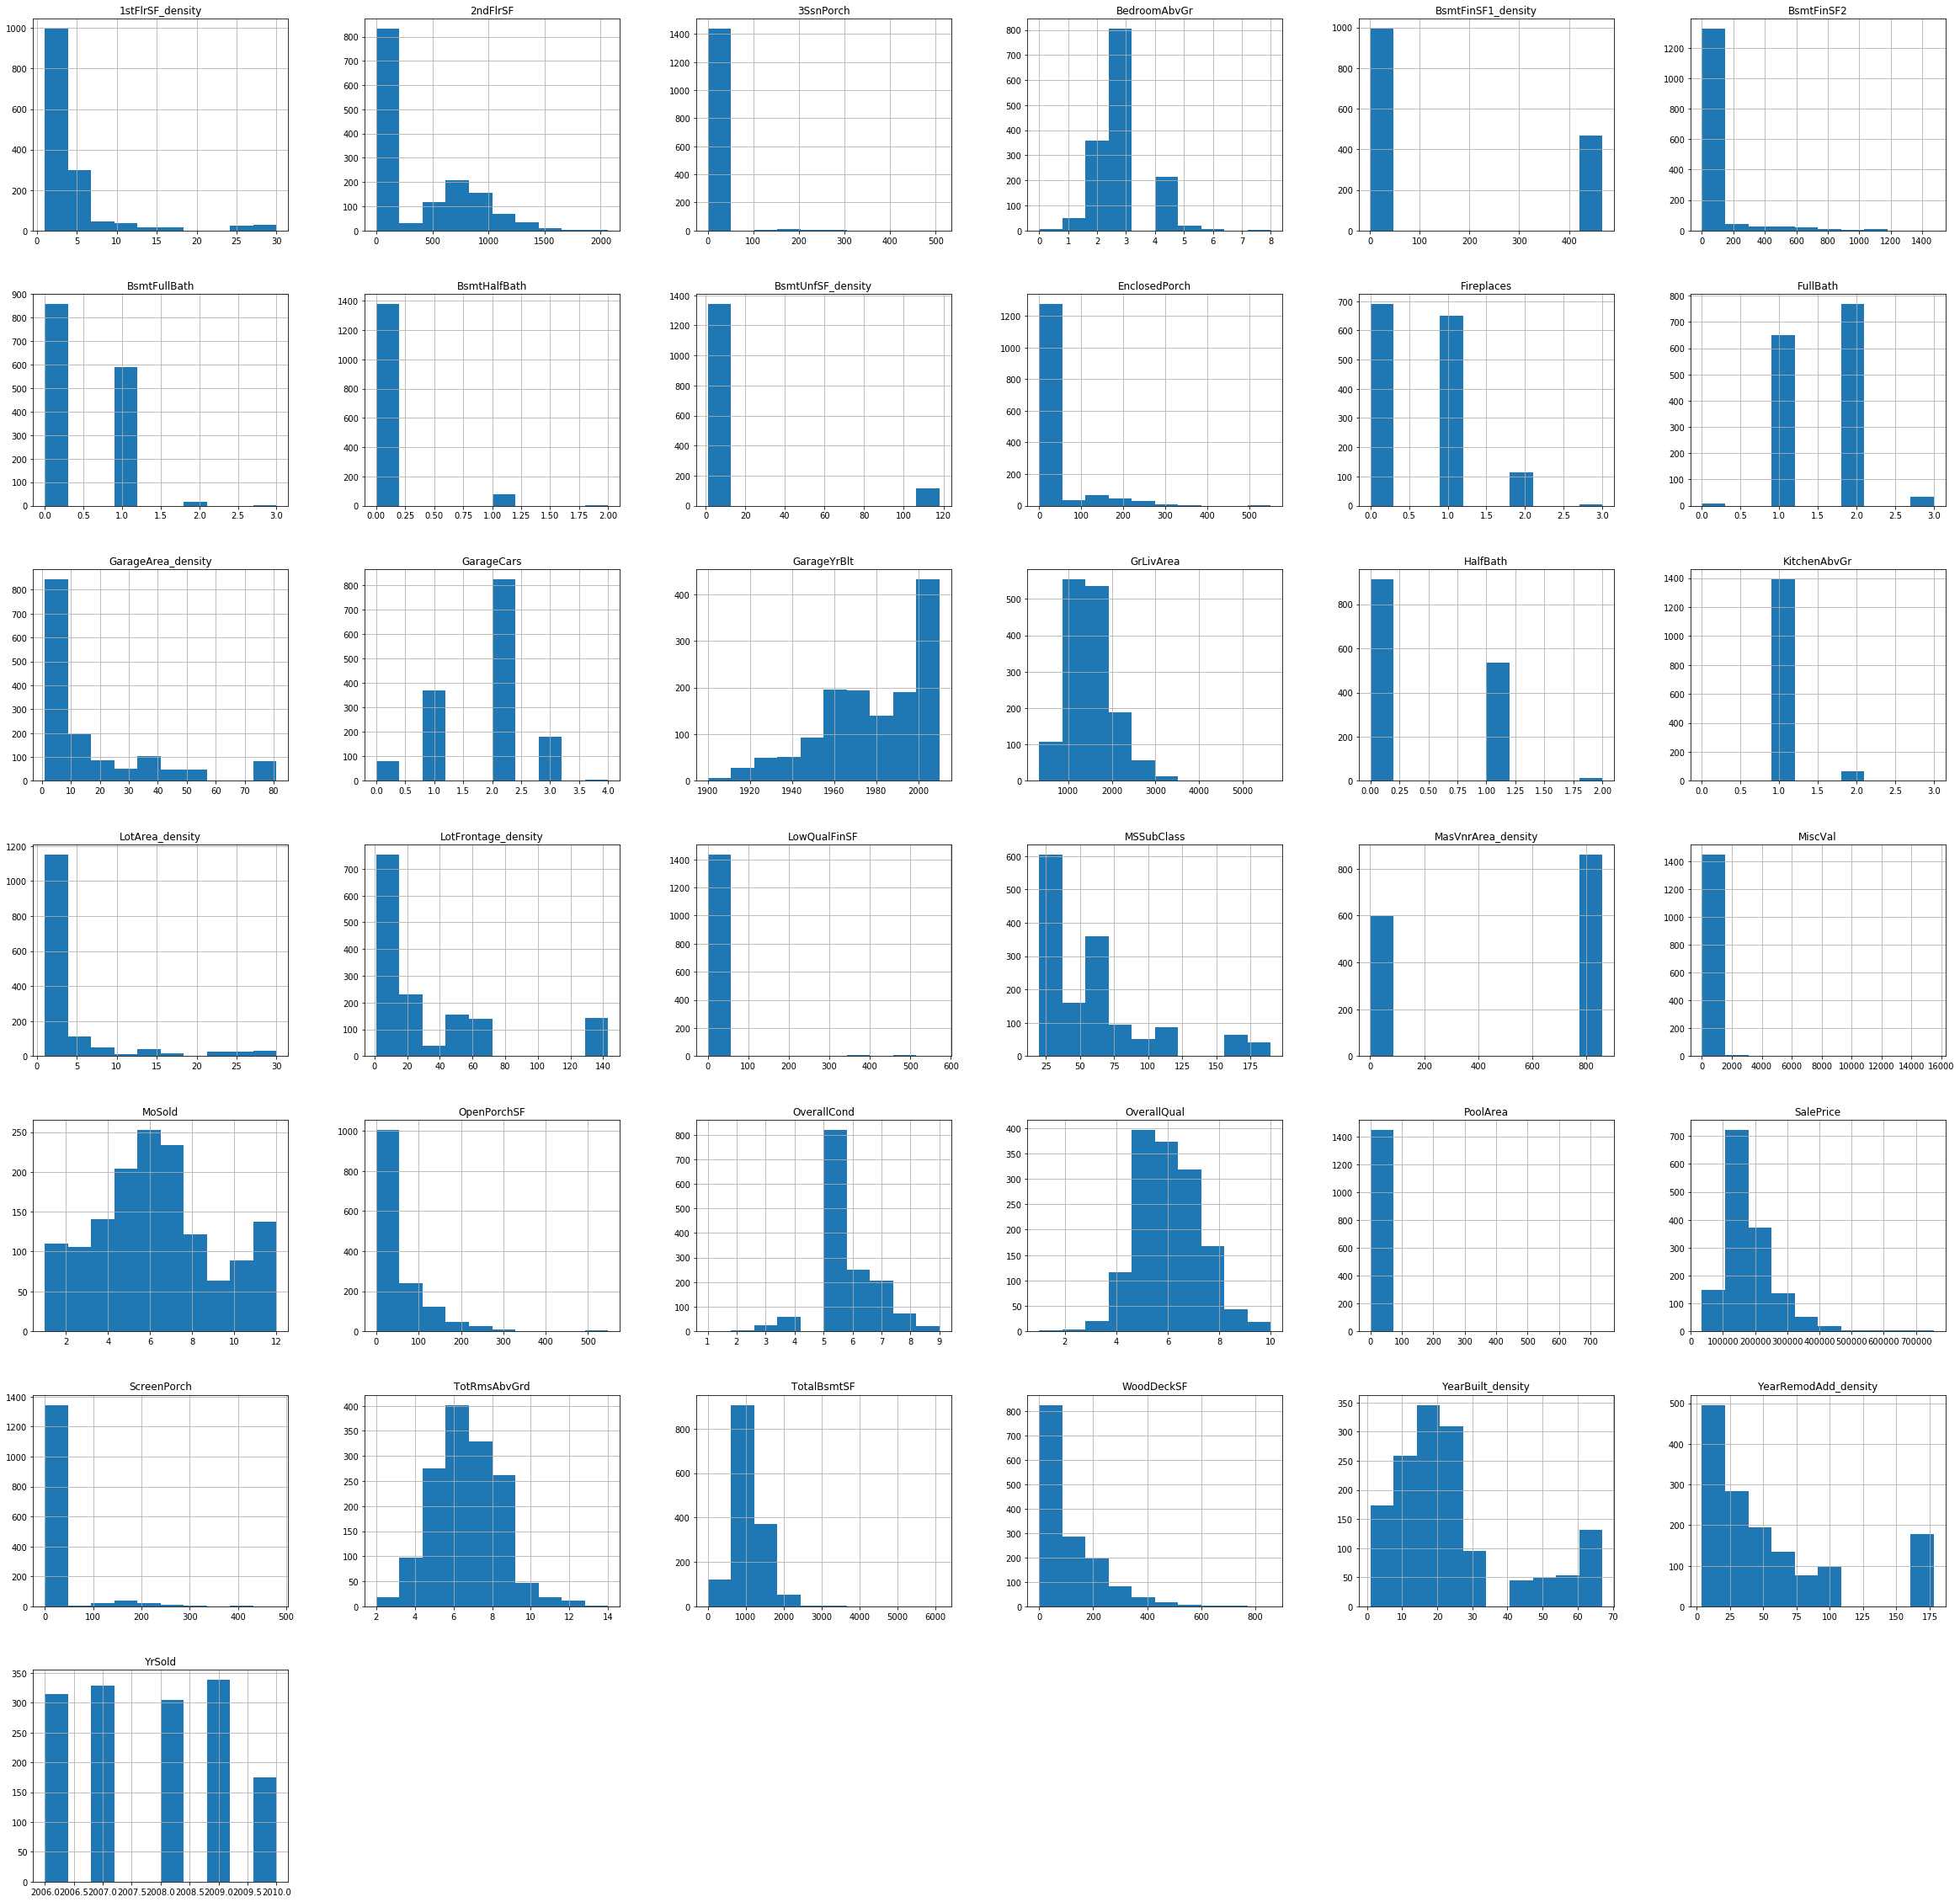

In [53]:
sml.plot.distribute()

In [65]:
sml.train.columns

Index([          u'MSSubClass',             u'MSZoning',
                     u'Street',                u'Alley',
                   u'LotShape',          u'LandContour',
                  u'Utilities',            u'LotConfig',
                  u'LandSlope',         u'Neighborhood',
                 u'Condition1',           u'Condition2',
                   u'BldgType',           u'HouseStyle',
                u'OverallQual',          u'OverallCond',
                  u'RoofStyle',             u'RoofMatl',
                u'Exterior1st',          u'Exterior2nd',
                 u'MasVnrType',            u'ExterQual',
                  u'ExterCond',           u'Foundation',
                   u'BsmtQual',             u'BsmtCond',
               u'BsmtExposure',         u'BsmtFinType1',
               u'BsmtFinType2',           u'BsmtFinSF2',
                    u'Heating',            u'HeatingQC',
                 u'CentralAir',           u'Electrical',
               u'LowQualFinSF',

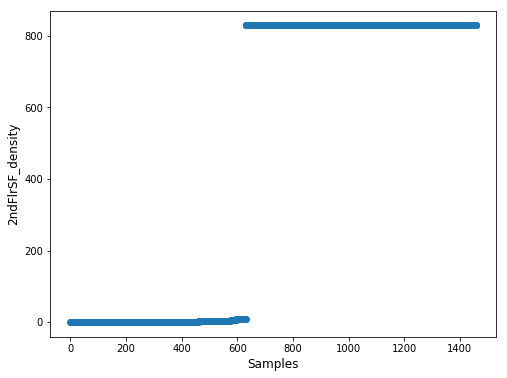

In [84]:
sml.plot.continuous(u'2ndFlrSF_density')

In [76]:
# To correct the outliers we fix only values in upper range of the 99th percentile. 
# As the results show these constitute around 1% of overall samples.
features = ['1stFlrSF', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF']
features = ['GrLivArea'] 
for feature in features:
    sml.feature.outliers(feature, upper=98)

u'Fixed 30 or 2.05% upper outliers. '

In [77]:
# features = ['BsmtUnfSF', '1stFlrSF', 'LotFrontage', 'LotArea'， 'YearBuilt', 'YearRemodAdd', 
#     'GarageArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF']
features = [ 'GrLivArea']
for feature in features:
    #sml.plot.continuous(feature)
    sml.feature._density_by_feature(feature)
    sml.train[[feature, feature + '_density']].head()
sml.feature.drop(features)

,GrLivArea,GrLivArea_density
0,1710.0,5
1,1262.0,2
2,1786.0,3
3,1717.0,3
4,2198.0,1


u'Dropped 1 features with 80 features available.'

In [70]:
sml.feature.impute()
sml.info()

u'Imputed 6698 empty values to 0.'

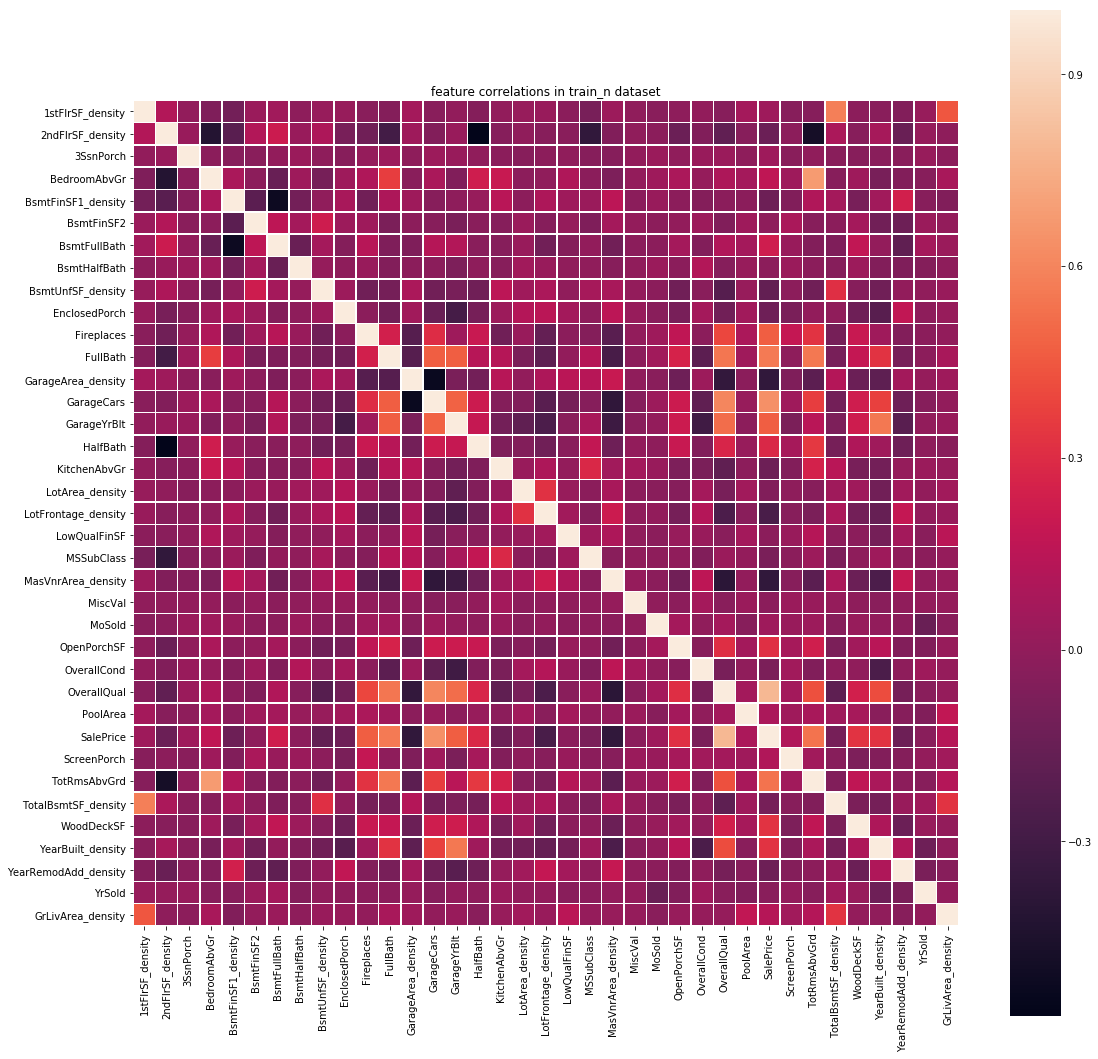

In [81]:
#sml.plot.crosstab('SalePrice', 'MoSold')
#sml.plot.correlate()
sml.eda()

In [85]:
#sml.plot.strip('BsmtFinSF1_density', '2ndFlrSF_density')
sml.model.data()

u'train_X: (1460, 79) train_y: (1460,) test_X: (1459, 79)'

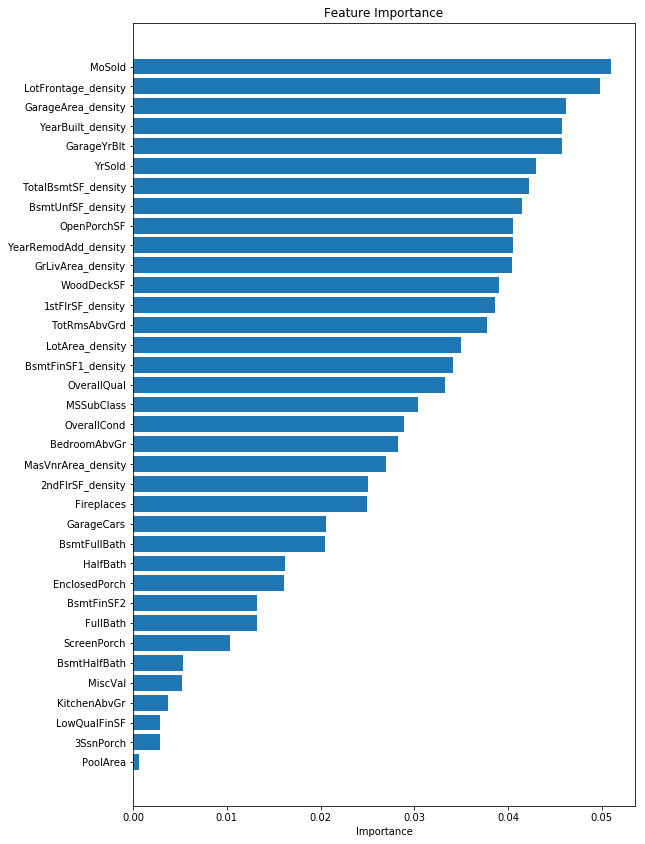

In [79]:
sml.plot.importance()

In [73]:
sml.train.head()

,1stFlrSF_density,2ndFlrSF_density,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1_density,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF_density,Utilities,WoodDeckSF,YearBuilt_density,YearRemodAdd_density,YrSold
0,1,1,0,Grvl,3,1Fam,TA,No,2,0.0,...,WD,0,Pave,8,3,AllPub,0,45,51,2008
1,2,829,0,Grvl,3,1Fam,TA,Gd,1,0.0,...,WD,0,Pave,6,2,AllPub,298,33,30,2007
2,2,3,0,Grvl,3,1Fam,TA,Mn,2,0.0,...,WD,0,Pave,6,2,AllPub,0,20,48,2008
3,2,5,0,Grvl,3,1Fam,Gd,No,2,0.0,...,WD,0,Pave,7,9,AllPub,0,10,26,2006
4,2,1,0,Grvl,4,1Fam,TA,Av,4,0.0,...,WD,0,Pave,9,3,AllPub,192,24,55,2008


In [86]:
select_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
fixed_params = {'learning_rate': 0.1, 'subsample': 0.8, 
                'colsample_bytree': 0.8, 'seed':0, 
                'objective': 'binary:logistic'}

sml.xgb.hyper(select_params, fixed_params)

/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/usr/local/Cellar/python/2.7.13_1/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = '/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = ''
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
/usr/local/Cellar/python/2.7.13_1/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x1011caa30, file "/usr...2.7/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from '/usr/local/lib/python2.7/site-packages/ipykernel/kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_fname='/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x1011caa30, file "/usr...2.7/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from '/usr/local/lib/python2.7/site-packages/ipykernel/kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/usr/local/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/usr/local/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/usr/local/lib/python2.7/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/usr/local/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/usr/local/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/usr/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/usr/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/usr/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/usr/local/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/usr/local/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/usr/local/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "select_params = {'max_depth': [3,5,7], 'min_chil...tic'}\n\nsml.xgb.hyper(select_params, fixed_params)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 12, 15, 8, 49, 56, 849017, tzinfo=tzutc()), 'msg_id': '217335D1A0A54C9A880737183DC4AC0D', 'msg_type': 'execute_request', 'session': '4475FFFF316442C088EB5B1EF5A06DD4', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '217335D1A0A54C9A880737183DC4AC0D', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['4475FFFF316442C088EB5B1EF5A06DD4']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "select_params = {'max_depth': [3,5,7], 'min_chil...tic'}\n\nsml.xgb.hyper(select_params, fixed_params)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 12, 15, 8, 49, 56, 849017, tzinfo=tzutc()), 'msg_id': '217335D1A0A54C9A880737183DC4AC0D', 'msg_type': 'execute_request', 'session': '4475FFFF316442C088EB5B1EF5A06DD4', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '217335D1A0A54C9A880737183DC4AC0D', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/usr/local/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['4475FFFF316442C088EB5B1EF5A06DD4'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "select_params = {'max_depth': [3,5,7], 'min_chil...tic'}\n\nsml.xgb.hyper(select_params, fixed_params)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 12, 15, 8, 49, 56, 849017, tzinfo=tzutc()), 'msg_id': '217335D1A0A54C9A880737183DC4AC0D', 'msg_type': 'execute_request', 'session': '4475FFFF316442C088EB5B1EF5A06DD4', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '217335D1A0A54C9A880737183DC4AC0D', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/usr/local/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u"select_params = {'max_depth': [3,5,7], 'min_ch...'}\n\nsml.xgb.hyper(select_params, fixed_params)", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u"select_params = {'max_depth': [3,5,7], 'min_ch...'}\n\nsml.xgb.hyper(select_params, fixed_params)"
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/usr/local/lib/python2.7/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u"select_params = {'max_depth': [3,5,7], 'min_ch...'}\n\nsml.xgb.hyper(select_params, fixed_params)",), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u"select_params = {'max_depth': [3,5,7], 'min_ch...'}\n\nsml.xgb.hyper(select_params, fixed_params)",)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u"select_params = {'max_depth': [3,5,7], 'min_ch...'}\n\nsml.xgb.hyper(select_params, fixed_params)", store_history=True, silent=False, shell_futures=True)
   2713                 self.displayhook.exec_result = result
   2714 
   2715                 # Execute the user code
   2716                 interactivity = "none" if silent else self.ast_node_interactivity
   2717                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2718                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = u'all'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2719                 
   2720                 self.last_execution_succeeded = not has_raised
   2721 
   2722                 # Reset this so later displayed values do not modify the

...........................................................................
/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-86-f8a7b902fefd>', interactivity=u'all', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at 1095afe10, execution_..._before_exec=None error_in_exec=None result=None>)
   2823                     return True
   2824 
   2825             for i, node in enumerate(to_run_interactive):
   2826                 mod = ast.Interactive([node])
   2827                 code = compiler(mod, cell_name, "single")
-> 2828                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1082336b0, file "<ipython-input-86-f8a7b902fefd>", line 6>
        result = <ExecutionResult object at 1095afe10, execution_..._before_exec=None error_in_exec=None result=None>
   2829                     return True
   2830 
   2831             # Flush softspace
   2832             if softspace(sys.stdout, 0):

...........................................................................
/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1082336b0, file "<ipython-input-86-f8a7b902fefd>", line 6>, result=<ExecutionResult object at 1095afe10, execution_..._before_exec=None error_in_exec=None result=None>)
   2877         outflag = 1  # happens in more places, so it's easier as default
   2878         try:
   2879             try:
   2880                 self.hooks.pre_run_code_hook()
   2881                 #rprint('Running code', repr(code_obj)) # dbg
-> 2882                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1082336b0, file "<ipython-input-86-f8a7b902fefd>", line 6>
        self.user_global_ns = {'In': ['', u"from speedml import Speedml\nsml = Speedml('./...ePrice',\n              uid = 'Id')\nsml.shape()", u'sml.eda()', u"get_ipython().magic(u'pinfo sml.configure')", u"sml.configure('overfit_threshold', \n         ...p.sqrt(sml.train.shape[0]) / sml.train.shape[0])", u'sml.eda()', u'sml.train.head()', u'sml.plot.correlate()', u'sml.plot.distribute()', u"sml.plot.continuous('TotRmsAbvGrd')", u'sml.train.columns', u"sml.plot.continuous('1stFlrSF')", u"# To correct the outliers we fix only values i...les.\nsml.feature.outliers('1stFlrSF', upper=98)", u"sml.plot.continuous('1stFlrSF')", u"sml.plot.continuous('FullBath')", u"sml.plot.continuous('OverallCond')", u"sml.plot.continuous('BsmtUnfSF')", u"sml.plot.ordinal('OverallCond')", u"sml.plot.strip('1stFlrSF', 'OverallCond')", u"sml.plot.continuous('MSSubClass')", ...], 'Out': {1: u'train (1460, 80) | test (1459, 79)', 2:                                                 ...                      Dimensionality reduction?  , 4: {u'high_cardinality': 10, u'outlier_threshold': 3, u'outpath': u'output/', u'overfit_threshold': 0.026171196129510684, u'unique_ratio': 80}, 5:                                                 ...                      Dimensionality reduction?  , 6:    MSSubClass MSZoning  LotFrontage  LotArea Str...       Normal     250000  

[5 rows x 80 columns], 10: Index([u'MSSubClass', u'MSZoning', u'LotFrontage...ion',
       u'SalePrice'],
      dtype='object'), 12: u'Fixed 30 or 2.05% upper outliers. ', 20:    BsmtUnfSF  BsmtUnfSF_density
0        150    ...                3
4        490                  5, 28: u'Fixed 30 or 2.05% upper outliers. ', 29:    LotArea  LotArea_density
0   8450.0          ...50.0                1
4  14260.0                1, ...}, 'Speedml': <class 'speedml.Speedml'>, '_': u'train_X: (1460, 79) train_y: (1460,) test_X: (1459, 79)', '_1': u'train (1460, 80) | test (1459, 79)', '_10': Index([u'MSSubClass', u'MSZoning', u'LotFrontage...ion',
       u'SalePrice'],
      dtype='object'), '_12': u'Fixed 30 or 2.05% upper outliers. ', '_2':                                                 ...                      Dimensionality reduction?  , '_20':    BsmtUnfSF  BsmtUnfSF_density
0        150    ...                3
4        490                  5, '_28': u'Fixed 30 or 2.05% upper outliers. ', ...}
        self.user_ns = {'In': ['', u"from speedml import Speedml\nsml = Speedml('./...ePrice',\n              uid = 'Id')\nsml.shape()", u'sml.eda()', u"get_ipython().magic(u'pinfo sml.configure')", u"sml.configure('overfit_threshold', \n         ...p.sqrt(sml.train.shape[0]) / sml.train.shape[0])", u'sml.eda()', u'sml.train.head()', u'sml.plot.correlate()', u'sml.plot.distribute()', u"sml.plot.continuous('TotRmsAbvGrd')", u'sml.train.columns', u"sml.plot.continuous('1stFlrSF')", u"# To correct the outliers we fix only values i...les.\nsml.feature.outliers('1stFlrSF', upper=98)", u"sml.plot.continuous('1stFlrSF')", u"sml.plot.continuous('FullBath')", u"sml.plot.continuous('OverallCond')", u"sml.plot.continuous('BsmtUnfSF')", u"sml.plot.ordinal('OverallCond')", u"sml.plot.strip('1stFlrSF', 'OverallCond')", u"sml.plot.continuous('MSSubClass')", ...], 'Out': {1: u'train (1460, 80) | test (1459, 79)', 2:                                                 ...                      Dimensionality reduction?  , 4: {u'high_cardinality': 10, u'outlier_threshold': 3, u'outpath': u'output/', u'overfit_threshold': 0.026171196129510684, u'unique_ratio': 80}, 5:                                                 ...                      Dimensionality reduction?  , 6:    MSSubClass MSZoning  LotFrontage  LotArea Str...       Normal     250000  

[5 rows x 80 columns], 10: Index([u'MSSubClass', u'MSZoning', u'LotFrontage...ion',
       u'SalePrice'],
      dtype='object'), 12: u'Fixed 30 or 2.05% upper outliers. ', 20:    BsmtUnfSF  BsmtUnfSF_density
0        150    ...                3
4        490                  5, 28: u'Fixed 30 or 2.05% upper outliers. ', 29:    LotArea  LotArea_density
0   8450.0          ...50.0                1
4  14260.0                1, ...}, 'Speedml': <class 'speedml.Speedml'>, '_': u'train_X: (1460, 79) train_y: (1460,) test_X: (1459, 79)', '_1': u'train (1460, 80) | test (1459, 79)', '_10': Index([u'MSSubClass', u'MSZoning', u'LotFrontage...ion',
       u'SalePrice'],
      dtype='object'), '_12': u'Fixed 30 or 2.05% upper outliers. ', '_2':                                                 ...                      Dimensionality reduction?  , '_20':    BsmtUnfSF  BsmtUnfSF_density
0        150    ...                3
4        490                  5, '_28': u'Fixed 30 or 2.05% upper outliers. ', ...}
   2883             finally:
   2884                 # Reset our crash handler in place
   2885                 sys.excepthook = old_excepthook
   2886         except SystemExit as e:

...........................................................................
/Users/wangzhiguo/deeplearn/kaggle/house_price/<ipython-input-86-f8a7b902fefd> in <module>()
      1 select_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
      2 fixed_params = {'learning_rate': 0.1, 'subsample': 0.8, 
      3                 'colsample_bytree': 0.8, 'seed':0, 
      4                 'objective': 'binary:logistic'}
      5 
----> 6 sml.xgb.hyper(select_params, fixed_params)

...........................................................................
/usr/local/lib/python2.7/site-packages/speedml/xgb.py in hyper(self=<speedml.xgb.Xgb object>, select_params={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]}, fixed_params={'colsample_bytree': 0.8, 'learning_rate': 0.1, 'objective': 'binary:logistic', 'seed': 0, 'subsample': 0.8})
     36         """
     37         Tune XGBoost hyper-parameters by selecting from permutations of values from the ``select_params`` dictionary.
     38         Remaining parameters with single values are specified by the ``fixed_params`` dictionary. Returns a dataframe with ranking of ``select_params`` items.
     39         """
     40         optimized_GBM = GridSearchCV(xgb.XGBClassifier(**fixed_params), select_params, scoring = 'accuracy', cv = 5, n_jobs = -1)
---> 41         optimized_GBM.fit(Base.train_X, Base.train_y)
        optimized_GBM.fit = <bound method GridSearchCV.fit of GridSearchCV(c...ore=True,
       scoring=u'accuracy', verbose=0)>
     42         df = pd.DataFrame(optimized_GBM.cv_results_)[['rank_test_score', 'params']].sort_values(by='rank_test_score')
     43         df.rename(columns = {'rank_test_score': 'rank'}, inplace = True)
     44         return df
     45 

...........................................................................
/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=5, error_score='raise',
       e...core=True,
       scoring=u'accuracy', verbose=0), X=array([[1, 1, 0, ..., 51, 2008, 5],
       [2, 8...    [1, 829, 0, ..., 19, 2008, 1]], dtype=object), y=0       208500
1       181500
2       223500
3  ...2125
1459    147500
Name: SalePrice, dtype: int64, groups=None, **fit_params={})
    633                                   return_train_score=self.return_train_score,
    634                                   return_n_test_samples=True,
    635                                   return_times=True, return_parameters=False,
    636                                   error_score=self.error_score)
    637           for parameters, (train, test) in product(candidate_params,
--> 638                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=5, random_state=None, shuffle=False)>
        X = array([[1, 1, 0, ..., 51, 2008, 5],
       [2, 8...    [1, 829, 0, ..., 19, 2008, 1]], dtype=object)
        y = 0       208500
1       181500
2       223500
3  ...2125
1459    147500
Name: SalePrice, dtype: int64
        groups = None
    639 
    640         # if one choose to see train score, "out" will contain train score info
    641         if self.return_train_score:
    642             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/usr/local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object <genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Fri Dec 15 16:49:57 2017
PID: 21881               Python 2.7.13: /usr/local/opt/python/bin/python2.7
...........................................................................
/usr/local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (XGBClassifier(base_score=0.5, colsample_bylevel=...pos_weight=1, seed=0, silent=True, subsample=0.8), array([[1, 1, 0, ..., 51, 2008, 5],
       [2, 8...    [1, 829, 0, ..., 19, 2008, 1]], dtype=object), 0       208500
1       181500
2       223500
3  ...2125
1459    147500
Name: SalePrice, dtype: int64, {'score': make_scorer(accuracy_score)}, array([  23,   71,  120,  130,  131,  134,  149,...1448, 1450, 1452, 1453, 1454,
       1455, 1456]), array([   0,    1,    2,    3,    4,    5,    6,...1443,
       1444, 1449, 1451, 1457, 1458, 1459]), 0, {'max_depth': 3, 'min_child_weight': 1})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}
        self.items = [(<function _fit_and_score>, (XGBClassifier(base_score=0.5, colsample_bylevel=...pos_weight=1, seed=0, silent=True, subsample=0.8), array([[1, 1, 0, ..., 51, 2008, 5],
       [2, 8...    [1, 829, 0, ..., 19, 2008, 1]], dtype=object), 0       208500
1       181500
2       223500
3  ...2125
1459    147500
Name: SalePrice, dtype: int64, {'score': make_scorer(accuracy_score)}, array([  23,   71,  120,  130,  131,  134,  149,...1448, 1450, 1452, 1453, 1454,
       1455, 1456]), array([   0,    1,    2,    3,    4,    5,    6,...1443,
       1444, 1449, 1451, 1457, 1458, 1459]), 0, {'max_depth': 3, 'min_child_weight': 1}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=XGBClassifier(base_score=0.5, colsample_bylevel=...pos_weight=1, seed=0, silent=True, subsample=0.8), X=array([[1, 1, 0, ..., 51, 2008, 5],
       [2, 8...    [1, 829, 0, ..., 19, 2008, 1]], dtype=object), y=0       208500
1       181500
2       223500
3  ...2125
1459    147500
Name: SalePrice, dtype: int64, scorer={'score': make_scorer(accuracy_score)}, train=array([  23,   71,  120,  130,  131,  134,  149,...1448, 1450, 1452, 1453, 1454,
       1455, 1456]), test=array([   0,    1,    2,    3,    4,    5,    6,...1443,
       1444, 1449, 1451, 1457, 1458, 1459]), verbose=0, parameters={'max_depth': 3, 'min_child_weight': 1}, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    432 
    433     try:
    434         if y_train is None:
    435             estimator.fit(X_train, **fit_params)
    436         else:
--> 437             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method XGBClassifier.fit of XGBClassifier...os_weight=1, seed=0, silent=True, subsample=0.8)>
        X_train = array([[3, 829, 0, ..., 30, 2007, 2],
       [2,...    [30, 829, 0, ..., 9, 2010, 1]], dtype=object)
        y_train = 23      129900
71      129500
120     180000
130...5000
1456    210000
Name: SalePrice, dtype: int64
        fit_params = {}
    438 
    439     except Exception as e:
    440         # Note fit time as time until error
    441         fit_time = time.time() - start_time

...........................................................................
/usr/local/lib/python2.7/site-packages/xgboost/sklearn.py in fit(self=XGBClassifier(base_score=0.5, colsample_bylevel=...pos_weight=1, seed=0, silent=True, subsample=0.8), X=array([[3, 829, 0, ..., 30, 2007, 2],
       [2,...    [30, 829, 0, ..., 9, 2010, 1]], dtype=object), y=23      129900
71      129500
120     180000
130...5000
1456    210000
Name: SalePrice, dtype: int64, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True)
    434         if sample_weight is not None:
    435             train_dmatrix = DMatrix(X, label=training_labels, weight=sample_weight,
    436                                     missing=self.missing)
    437         else:
    438             train_dmatrix = DMatrix(X, label=training_labels,
--> 439                                     missing=self.missing)
        self.missing = nan
    440 
    441         self._Booster = train(xgb_options, train_dmatrix, self.n_estimators,
    442                               evals=evals,
    443                               early_stopping_rounds=early_stopping_rounds,

...........................................................................
/usr/local/lib/python2.7/site-packages/xgboost/core.py in __init__(self=<xgboost.core.DMatrix object>, data=array([[3, 829, 0, ..., 30, 2007, 2],
       [2,...    [30, 829, 0, ..., 9, 2010, 1]], dtype=object), label=array([ 69,  68, 157, 209, 225, 157,  43, 249, 2...67, 118, 222,  39,  83,  99,  10, 161, 146, 192]), missing=nan, weight=None, silent=False, feature_names=None, feature_types=None)
    263         elif isinstance(data, scipy.sparse.csr_matrix):
    264             self._init_from_csr(data)
    265         elif isinstance(data, scipy.sparse.csc_matrix):
    266             self._init_from_csc(data)
    267         elif isinstance(data, np.ndarray):
--> 268             self._init_from_npy2d(data, missing)
        self._init_from_npy2d = <bound method DMatrix._init_from_npy2d of <xgboost.core.DMatrix object>>
        data = array([[3, 829, 0, ..., 30, 2007, 2],
       [2,...    [30, 829, 0, ..., 9, 2010, 1]], dtype=object)
        missing = nan
    269         else:
    270             try:
    271                 csr = scipy.sparse.csr_matrix(data)
    272                 self._init_from_csr(csr)

...........................................................................
/usr/local/lib/python2.7/site-packages/xgboost/core.py in _init_from_npy2d(self=<xgboost.core.DMatrix object>, mat=array([[3, 829, 0, ..., 30, 2007, 2],
       [2,...    [30, 829, 0, ..., 9, 2010, 1]], dtype=object), missing=nan)
    310         """
    311         Initialize data from a 2-D numpy matrix.
    312         """
    313         if len(mat.shape) != 2:
    314             raise ValueError('Input numpy.ndarray must be 2 dimensional')
--> 315         data = np.array(mat.reshape(mat.size), dtype=np.float32)
        data = undefined
        mat.reshape = <built-in method reshape of numpy.ndarray object>
        mat.size = 57512
    316         self.handle = ctypes.c_void_p()
    317         missing = missing if missing is not None else np.nan
    318         _check_call(_LIB.XGDMatrixCreateFromMat(data.ctypes.data_as(ctypes.POINTER(ctypes.c_float)),
    319                                                 mat.shape[0], mat.shape[1],

ValueError: could not convert string to float: AllPub
___________________________________________________________________________

In [102]:
#sml.eda()
#sml.train.describe()
sml.train.describe(include=['O'])

,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,...,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Utilities
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,4,4,6,6,4,2,9,8,5,...,4,4,25,3,3,8,6,6,9,2
top,1Fam,TA,No,Unf,Unf,TA,Y,Norm,Norm,SBrkr,...,None,Shed,NAmes,Y,Ex,CompShg,Gable,Normal,WD,AllPub
freq,1220,1348,991,467,1294,686,1365,1260,1445,1335,...,872,1455,225,1340,1455,1434,1141,1198,1267,1459


In [117]:
sml.train.head()

,1stFlrSF_density,2ndFlrSF_density,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1_density,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF_density,Utilities,WoodDeckSF,YearBuilt_density,YearRemodAdd_density,YrSold,GrLivArea_density
0,1,1,0,0,3,1Fam,TA,No,2,0.0,...,0,1,8,3,AllPub,0,45,51,2008,5
1,2,829,0,0,3,1Fam,TA,Gd,1,0.0,...,0,1,6,2,AllPub,298,33,30,2007,2
2,2,3,0,0,3,1Fam,TA,Mn,2,0.0,...,0,1,6,2,AllPub,0,20,48,2008,3
3,2,5,0,0,3,1Fam,Gd,No,2,0.0,...,0,1,7,9,AllPub,0,10,26,2006,3
4,2,1,0,0,4,1Fam,TA,Av,4,0.0,...,0,1,9,3,AllPub,192,24,55,2008,1


In [99]:
sml.feature.mapping('Alley', {'Grvl': 0, 'Pave': 1})
sml.feature.mapping('Street', {'Grvl': 0, 'Pave': 1}) 

In [129]:
set(sml.train.BldgType.values)
# text to number

{'1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'}